The goal of this notebook is to persist DecisionTree models. They will be used as input for unit tests.

# Imports

In [1]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/..")

In [17]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from joblib import dump, load

from dtreeviz.trees import *

import graphviz
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Load/prepare data

In [4]:
dataset = pd.read_csv("../data/titanic/titanic.csv")

In [5]:
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)

# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

In [6]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
random_state = 1234


In [10]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=random_state)
dtc.fit(dataset[features], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

# Save/read the model

In [18]:
#dump(dtc, "../tests/unit/fixtures/decision_tree_classifier.joblib")

['../tests/unit/fixtures/decision_tree_classifier.joblib']

In [23]:
dtc2 = load("../tests/unit/fixtures/decision_tree_classifier.joblib")

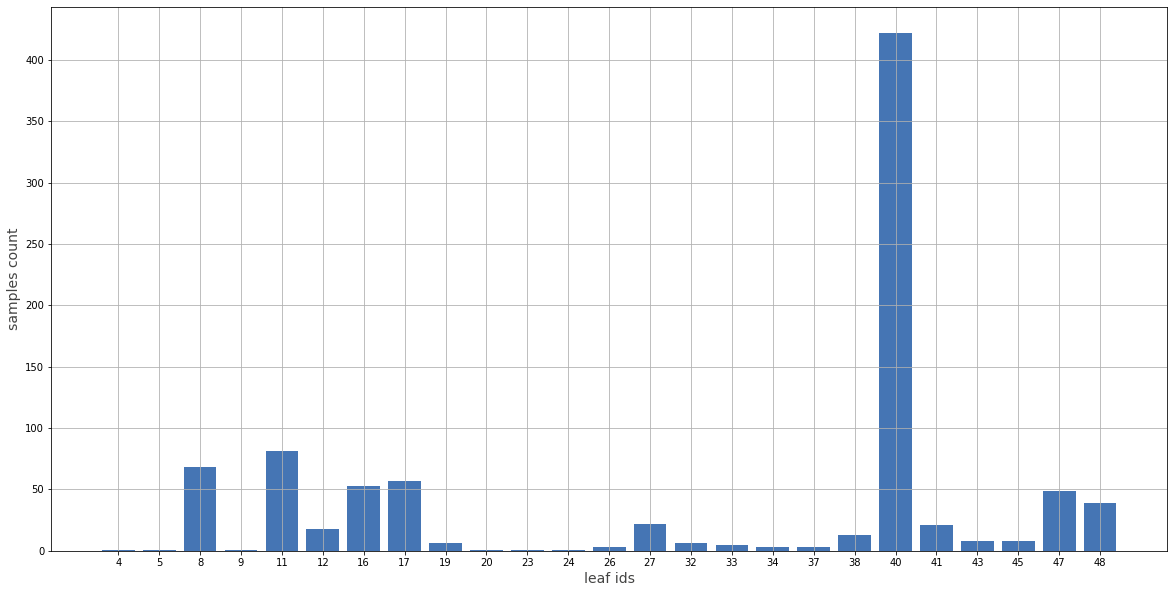

In [24]:
ctreeviz_leaf_samples(dtc2, figsize=(20,10))